In [1]:
from pathlib import Path

In [19]:
path = Path('./data')

In [3]:
!ls -l ~/data

total 486156
-rw-rw-r-- 1 arto arto     78317 Jul  3 11:46 0B1jt7lJDEXy3SmZEdDd0aWpXcWc
drwxrwxr-x 2 arto arto    385024 May  8  2017 RSICD_images
-rw-rw-r-- 1 arto arto 482109560 Jul  3 11:55 RSICD_images.rar
-rw-rw-r-- 1 arto arto  15237158 Jul  3 12:07 dataset_rsicd.json


In [21]:
import json

with open(path/"dataset_rsicd.json") as f:
    ds = json.load(f)

In [22]:
ds.keys()

dict_keys(['images', 'dataset'])

In [23]:
type(ds['images'])

list

In [24]:
from datasets import Dataset, DatasetDict

In [25]:
ds1 = Dataset.from_json(path.as_posix()+'/dataset_rsicd.json', field='images')
sample = ds1[0]

Using custom data configuration default-0c017af6fbc61539


0 tables [00:00, ? tables/s]

Dataset json downloaded and prepared to /home/arto/.cache/huggingface/datasets/json/default-0c017af6fbc61539/0.0.0. Subsequent calls will reuse this data.


In [26]:
sample.keys()

dict_keys(['filename', 'imgid', 'sentences', 'split', 'sentids'])

In [27]:
for k, v in sample.items():
    print(k, type(v))

filename <class 'str'>
imgid <class 'int'>
sentences <class 'list'>
split <class 'str'>
sentids <class 'list'>


In [28]:
len(ds1['filename'])

10921

In [29]:
set(ds1['split'])

{'test', 'train', 'val'}

In [30]:
ds1['sentences'][:2]

[[{'tokens': ['many',
    'planes',
    'are',
    'parked',
    'next',
    'to',
    'a',
    'long',
    'building',
    'in',
    'an',
    'airport'],
   'raw': 'many planes are parked next to a long building in an airport .',
   'imgid': 0,
   'sentid': 0},
  {'tokens': ['many',
    'planes',
    'are',
    'parked',
    'next',
    'to',
    'a',
    'long',
    'building',
    'in',
    'an',
    'airport'],
   'raw': 'many planes are parked next to a long building in an airport .',
   'imgid': 0,
   'sentid': 1},
  {'tokens': ['many',
    'planes',
    'are',
    'parked',
    'next',
    'to',
    'a',
    'long',
    'building',
    'in',
    'an',
    'airport'],
   'raw': 'many planes are parked next to a long building in an airport .',
   'imgid': 0,
   'sentid': 2},
  {'tokens': ['many',
    'planes',
    'are',
    'parked',
    'next',
    'to',
    'a',
    'long',
    'building',
    'in',
    'an',
    'airport'],
   'raw': 'many planes are parked next to a long bui

Each image has % associated sentences:

In [32]:
for x in ds1['sentids']:
    assert len(x) == 5

In [33]:
!ls -U ~/data/RSICD_images/ | head -10

denseresidential_174.jpg
viaduct_238.jpg
00676.jpg
center_21.jpg
mediumresidential_124.jpg
railwaystation_82.jpg
bareland_253.jpg
resort_177.jpg
farmland_351.jpg
00740.jpg
ls: write error: Broken pipe


In [34]:
# from datasets.download_manager import *

In [37]:
with open(path/'RSICD_images/stadium_1.jpg', 'rb') as f:
    bimg = f.read()
# bimg

In [38]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

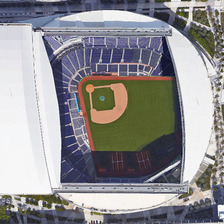

In [40]:
img = Image.open(path/"RSICD_images/stadium_1.jpg")
img

In [43]:
img = np.asarray(Image.open(path/'RSICD_images/stadium_1.jpg'))

In [44]:
img.shape

(224, 224, 3)

In [45]:
def read_image(filename):
    return np.asarray(Image.open(filename))

In [49]:
def add_image(example):
    return {'image':read_image(f"{path.as_posix()}/RSICD_images/{example['filename']}")}

In [46]:
import multiprocessing

multiprocessing.cpu_count()

96

In [51]:
import datasets

In [60]:
# ds1s = ds1.select(list(range(100)))

In [52]:
features = ds1.features.copy()
features["image"] = datasets.Array3D(shape=(224, 224, 3), dtype="uint8")

In [53]:
ds2 = ds1.map(add_images, features=features, num_proc=8)

In [56]:
ds2.features

{'filename': Value(dtype='string', id=None),
 'imgid': Value(dtype='int64', id=None),
 'sentences': [{'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
   'raw': Value(dtype='string', id=None),
   'imgid': Value(dtype='int64', id=None),
   'sentid': Value(dtype='int64', id=None)}],
 'split': Value(dtype='string', id=None),
 'sentids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
 'image': Array3D(shape=(224, 224, 3), dtype='uint8', id=None)}

In [60]:
def show_example(e):
    img = e["image"]
    plt.imshow(img)
    sid = random.randint(0,5)
    plt.title(e['sentences'][sid]['raw'])
    plt.show()

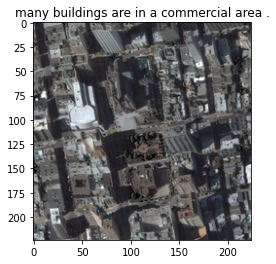

In [96]:
import random

id = random.randint(0, len(ds2)-1)
e = ds2[id]

img = e["image"]
plt.imshow(img)
sid = random.randint(0,4)
plt.title(e['sentences'][sid]['raw'])
plt.show()

In [62]:
from transformers import CLIPProcessor

In [63]:
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [64]:
e = ds2[0]
e.keys()

dict_keys(['filename', 'imgid', 'sentences', 'split', 'sentids', 'image'])

In [67]:
print(processor.__call__.__doc__)


        Main method to prepare for the model one or several sequences(s) and image(s). This method forwards the
        :obj:`text` and :obj:`kwargs` arguments to CLIPTokenizer's :meth:`~transformers.CLIPTokenizer.__call__` if
        :obj:`text` is not :obj:`None` to encode the text. To prepare the image(s), this method forwards the
        :obj:`images` and :obj:`kwrags` arguments to CLIPFeatureExtractor's
        :meth:`~transformers.CLIPFeatureExtractor.__call__` if :obj:`images` is not :obj:`None`. Please refer to the
        doctsring of the above two methods for more information.

        Args:
            text (:obj:`str`, :obj:`List[str]`, :obj:`List[List[str]]`):
                The sequence or batch of sequences to be encoded. Each sequence can be a string or a list of strings
                (pretokenized string). If the sequences are provided as list of strings (pretokenized), you must set
                :obj:`is_split_into_words=True` (to lift the ambiguity with a batch

In [68]:
e['sentences']

[{'tokens': ['many',
   'planes',
   'are',
   'parked',
   'next',
   'to',
   'a',
   'long',
   'building',
   'in',
   'an',
   'airport'],
  'raw': 'many planes are parked next to a long building in an airport .',
  'imgid': 0,
  'sentid': 0},
 {'tokens': ['many',
   'planes',
   'are',
   'parked',
   'next',
   'to',
   'a',
   'long',
   'building',
   'in',
   'an',
   'airport'],
  'raw': 'many planes are parked next to a long building in an airport .',
  'imgid': 0,
  'sentid': 1},
 {'tokens': ['many',
   'planes',
   'are',
   'parked',
   'next',
   'to',
   'a',
   'long',
   'building',
   'in',
   'an',
   'airport'],
  'raw': 'many planes are parked next to a long building in an airport .',
  'imgid': 0,
  'sentid': 2},
 {'tokens': ['many',
   'planes',
   'are',
   'parked',
   'next',
   'to',
   'a',
   'long',
   'building',
   'in',
   'an',
   'airport'],
  'raw': 'many planes are parked next to a long building in an airport .',
  'imgid': 0,
  'sentid': 3},
 {'t

In [97]:
n = 4
random_sentences  = []
for _ in range(n):
    idx = random.randint(0, len(ds2)-1)
    random_sentences.append(ds2[idx]['sentences'][0]['raw'])

In [105]:
image = np.array(e['image'])
sentences = [s['raw'] for s in e['sentences']]
# use 4 random sentences
# sentences = sentences[0:1] + random_sentences

inputs = processor(text=sentences, images=image, return_tensors="jax", padding=True)

In [99]:
for k,v in inputs.items():
    print(k, v.shape)

input_ids (5, 13)
attention_mask (5, 13)
pixel_values (1, 3, 224, 224)


In [90]:
from transformers import FlaxCLIPModel

model = FlaxCLIPModel.from_pretrained("openai/clip-vit-base-patch32")

In [100]:
outputs = model(**inputs)

In [106]:
sentences

['many buildings are in a commercial area .',
 'many buildings are in a commercial area .',
 'many buildings are in a commercial area .',
 'many buildings are in a commercial area .',
 'many buildings are in a commercial area .']

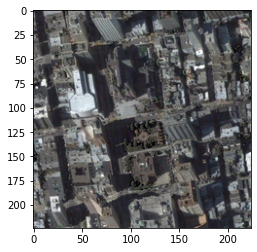

In [102]:
import matplotlib.pyplot as plt

plt.imshow(image);

In [103]:
outputs.logits_per_image

DeviceArray([[26.343533, 24.192152, 23.818138, 18.117622, 21.688086]], dtype=float32)

In [104]:
import jax

jax.nn.softmax(outputs.logits_per_image, axis=-1)

DeviceArray([[8.2909983e-01, 9.6443787e-02, 6.6350028e-02, 2.2189088e-04,
              7.8844763e-03]], dtype=float32)

### cifar10 ref

In [36]:
from datasets import load_dataset

In [38]:
cifar10 = load_dataset('cifar10', split='test')

Reusing dataset cifar10 (/root/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/951e017399fa3b30edfca56468a91ac6a03c9167c0b3f79367e777d1f9a0cf7e)


In [39]:
cifar10.features

{'img': Array3D(shape=(32, 32, 3), dtype='uint8', id=None),
 'label': ClassLabel(num_classes=10, names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], names_file=None, id=None)}

In [41]:
type(cifar10[0]['img'])

list

## UCM

In [ ]:
# !wget 

In [ ]:
import json

with open('/content/ucm_dataset.json') as f:
    ds = json.load(f)

JSONDecodeError: ignored